# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [3]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

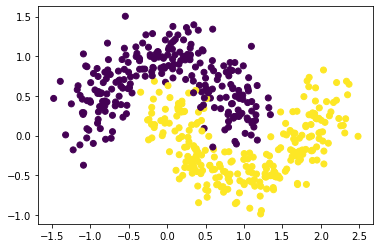

In [4]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from mlxtend.plotting import plot_decision_regions

lr = LogisticRegression(solver='liblinear', multi_class='auto', max_iter=1000) # add some params
svm = SVC(kernel='linear') # here too


In [6]:
# Make train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(moons_points, 
                                                    moons_labels, 
                                                    test_size=0.3, 
                                                    random_state=42)

def plot_decisions(X_train, y_train, X_test, y_test, clf):
    clf.fit(X_train, y_train)
    plot_decision_regions(X_train, y_train, clf=clf, legend=2)
    plt.show()
    accuracy = clf.score(X_test, y_test)
    print("Accuracy: ", accuracy)

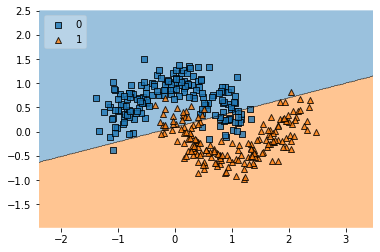

Accuracy:  0.8666666666666667


In [7]:
# Plot LogisticRegression decision regions
plot_decisions(X_train, y_train, X_test, y_test, lr)

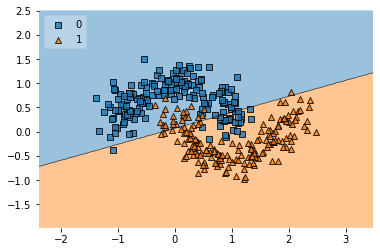

Accuracy:  0.8666666666666667


In [8]:
# Plot SVC decision regions
plot_decisions(X_train, y_train, X_test, y_test, svm)

Из-за работы с линейными классификаторами наша область оказалась поделена одной прямой.

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

{'degree': 2, 'gamma': 2, 'kernel': 'rbf'}


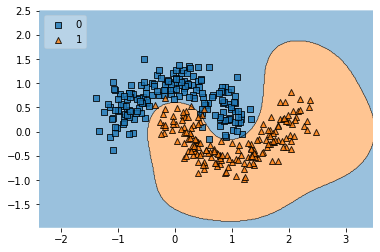

Accuracy:  0.9866666666666667


In [9]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
from IPython.display import display

# Find out the best combination of kernel and parameters
def find_the_best_kernel_and_parameters(X_train, y_train, X_test, y_test):
    param_grid = {'degree':[2, 3, 4, 5],
                  'gamma':[2, 1, 1/2 , 1/4,1/8, 1/16],
                  'kernel':['poly','rbf', 'sigmoid']}

    grid = GridSearchCV(estimator=SVC(),
                        param_grid=param_grid,
                        cv=5)
    grid_result = grid.fit(X_train, y_train)

    # The best combinations of parameters and their result
    print(grid_result.best_params_)

    # Plot decision regions for the best estimator
    plot_decisions(X_train, y_train, X_test, y_test, grid_result.best_estimator_)
    
find_the_best_kernel_and_parameters(X_train, y_train, X_test, y_test)

Следует уточнить также, что в связи изменениями выборки, лучшее ядро не всегда 'rbf' — иногда получается 'poly'.


Best params for poly:  {'degree': 3, 'gamma': 1}


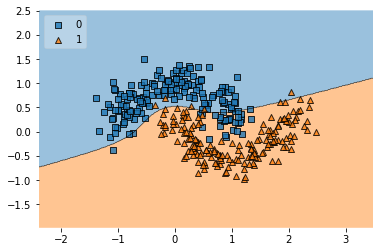

Accuracy:  0.9066666666666666

Best params for sigmoid:  {'degree': 2, 'gamma': 0.0625}


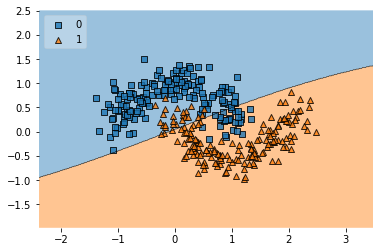

Accuracy:  0.8733333333333333


In [10]:
# What's happening in other kernels
kernels = ['poly', 'sigmoid']
param_grid = {'degree':[2, 3, 4, 5],
              'gamma':[2, 1, 1/2 , 1/4,1/8, 1/16]}

for kernel in kernels:
    grid = GridSearchCV(estimator=SVC(kernel=kernel),
                    param_grid=param_grid,
                    cv=5)
    
    grid_result = grid.fit(X_train, y_train)
    print("\nBest params for " + kernel + ": ", grid_result.best_params_)
    
    plot_decisions(X_train, y_train, X_test, y_test, grid_result.best_estimator_)

В связи с уходом с линейной модели качество предсказания сильно возросло. Наилучший результат дало ядро 'poly' со степенью 2 и gamma равными 1.

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Compare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

In [11]:
# Generate the set of new features
from sklearn.preprocessing import PolynomialFeatures

moons_featured = PolynomialFeatures(degree=2).fit_transform(moons_points, moons_labels)

X_train_featured, X_test_featured, y_train_featured, y_test_featured = train_test_split(moons_featured, 
                                                    moons_labels, 
                                                    test_size=0.2, 
                                                    random_state=42)
X_train_featured.shape

(400, 6)

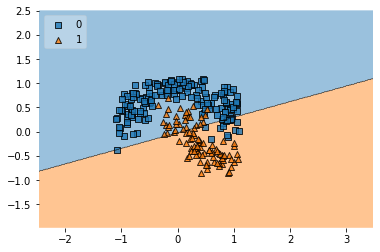

Accuracy:  0.86


In [12]:
# Train LR on it
lr.fit(X_train_featured, y_train_featured)

# Decision region for new features
value = 0.2
width = 1
# Plot decision regions
plot_decision_regions(X_train_featured, y_train_featured, clf=lr, legend=2, 
    feature_index=[1, 2],                         
    filler_feature_values={0: value, 3: value, 4: value, 5: value},
    filler_feature_ranges={0: width, 3: width, 4: width, 5: width})

plt.show()

# Calculate metric
accuracy = lr.score(X_test_featured, y_test_featured)
print("Accuracy: ", accuracy)

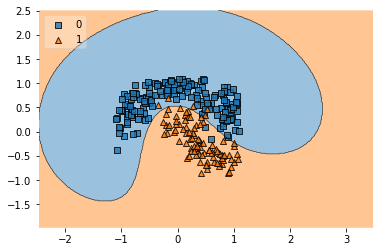

Accuracy:  0.98


In [13]:
# # Train SVM on it

svc = SVC(kernel='rbf', degree=2, gamma=1)
svc.fit(X_train_featured, y_train_featured)

# Decision region for new features
value = 0.2
width = 1
# Plot decision regions
plot_decision_regions(X_train_featured, y_train_featured, clf=svc,
                      feature_index=[1, 2],  
                      filler_feature_values={0: value, 3: value, 4: value, 5: value},
                      filler_feature_ranges={0: width, 3: width, 4: width, 5: width},
                      legend=2)
plt.show()

# Calculate metric
accuracy = svc.score(X_test_featured, y_test_featured)
print("Accuracy: ", accuracy)

Логистическая регрессия дает тот же результат, что и раньше. Вероятно, от того, что в заново сгенерированных данных нет ничего "нового".
Нелинейный SVM дает куда лучший результат.

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

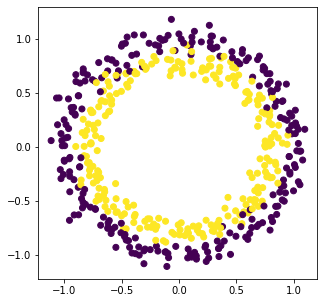

In [12]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

{'degree': 2, 'gamma': 1, 'kernel': 'poly'}


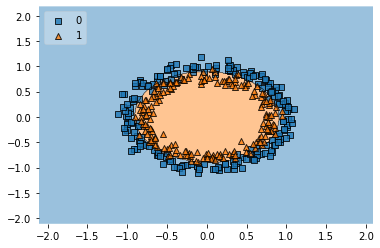

Accuracy:  0.95


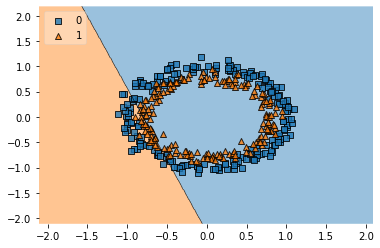

Accuracy:  0.38


In [20]:
X_train, X_test, y_train, y_test = train_test_split(circles_points, 
                                                    circles_labels, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Находим найоптимальнейшее ядро SVM
find_the_best_kernel_and_parameters(X_train, y_train, X_test, y_test)

# Сравниваем с работой LR
plot_decisions(X_train, y_train, X_test, y_test, lr)

And even more:

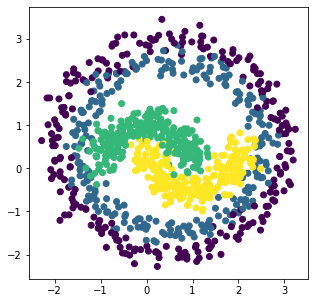

In [14]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(points, 
                                                    labels, 
                                                    test_size=0.2, 
                                                    random_state=42)

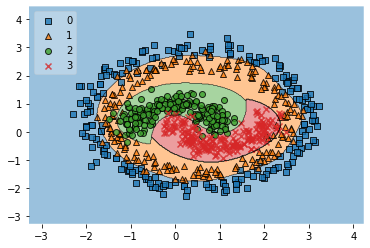

Accuracy:  0.945


In [16]:
svc = SVC(kernel='rbf', degree=2, gamma=1)
plot_decisions(X_train, y_train, X_test, y_test, svc)

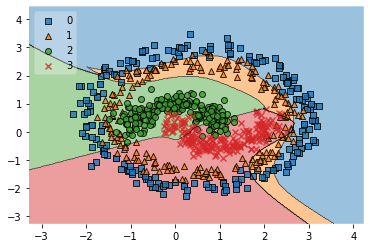

Accuracy:  0.605


In [19]:
svc = SVC(kernel='poly', degree=5, gamma=1)
plot_decisions(X_train, y_train, X_test, y_test, svc)

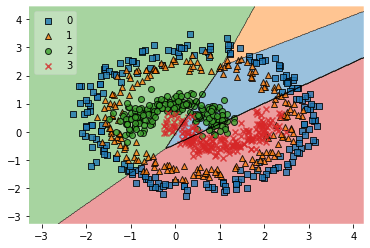

Accuracy:  0.39


In [17]:
plot_decisions(X_train, y_train, X_test, y_test, lr)

В силу линейности LR дает менее качественный ответ.